# Using IPCC Color Palattes

`pyam` supports the use of explicit IPCC AR5 and AR6 color palattes by providing the RCP and/or SSP of interest via the `pyam.run_control()`.

The full list of supported special colors is

In [1]:
import pyam
import pandas as pd

pd.DataFrame({'name': list(pyam.plotting.PYAM_COLORS.keys()), 
              'color': list(pyam.plotting.PYAM_COLORS.values())})

<IPython.core.display.Javascript object>

,name,color
0,AR6-SSP1-1.9,#00AAD0
1,AR6-SSP1-2.6,#003466
2,AR6-SSP2-4.5,#EF550F
3,AR6-SSP3-7.0,#E00000
4,AR6-SSP3-LowNTCF,#E00000
5,AR6-SSP4-3.4,#FFA900
6,AR6-SSP4-6.0,#C47900
7,AR6-SSP5-3.4-OS,#7F006E
8,AR6-SSP5-8.5,#990002
9,AR6-RCP-2.6,#003466


Let's pull out a few example scenarios from our tutorial dataset and plot them with defaults

INFO:root:Reading `tutorial_AR5_data.csv`


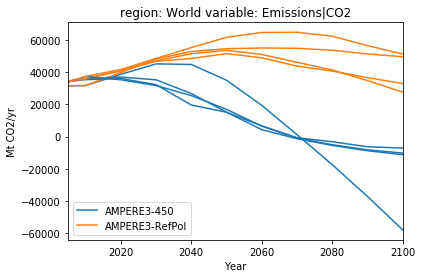

In [2]:
scenarios = ['AMPERE3-450', 'AMPERE3-RefPol']

df = (
    pyam.IamDataFrame(data='tutorial_AR5_data.csv', encoding='utf-8')
    .filter(variable='Emissions|CO2', region='World', scenario=scenarios)
)

df.line_plot(color='scenario')

As an example, let us say that each of these two scenario families correspond to scenarios in the AR6 context. We can utilize the specific colors by following three steps:

1. Add metadata to each scenario with relevant information which corresponds to the AR6-style scenario
2. Update `pyam.run_control()` telling it which metadata maps to which AR6 scenario color
2. Call `line_plot` using that meta data

### Updating metadata

The existing metadata looks like

In [3]:
df.meta

exclude
model       scenario               
GCAM 3.0    AMPERE3-450       False
            AMPERE3-RefPol    False
IMAGE 2.4   AMPERE3-450       False
            AMPERE3-RefPol    False
MESSAGE V.4 AMPERE3-450       False
            AMPERE3-RefPol    False
REMIND 1.5  AMPERE3-450       False
            AMPERE3-RefPol    False

We can update it in a variety of ways (see, e.g., `categorize()` in the "Pyam First Stesp" tutorial). Here, we simply add a new column labeling the scenarios with an SSP name.

Note, this label can be **anything**, it does not here need to map directly to the IPCC color scheme.

In [4]:
df.set_meta(['ssp2', 'ssp5'] * 4, name='ar6-type')
df.meta

exclude ar6-type
model       scenario                        
GCAM 3.0    AMPERE3-450       False     ssp2
            AMPERE3-RefPol    False     ssp5
IMAGE 2.4   AMPERE3-450       False     ssp2
            AMPERE3-RefPol    False     ssp5
MESSAGE V.4 AMPERE3-450       False     ssp2
            AMPERE3-RefPol    False     ssp5
REMIND 1.5  AMPERE3-450       False     ssp2
            AMPERE3-RefPol    False     ssp5

### Updating the run control

Next, we need to tell `pyam` that whenever it sees a certain `ar6-type`, it should use a specific color. We do this here in code, but it also works by specifying the mapping in a `yaml`  config file.

In [5]:
# Here we use the specific color name, e.g., "AR6-SSP2-4.5" anytime pyam sees "ssp2"

color_map = {
    'ssp2': 'AR6-SSP2-4.5', 
    'ssp5': 'AR6-SSP5-8.5',
}

pyam.run_control().update({'color': {'ar6-type': color_map}})

# Use the new colors

It's as simple as calling the plot function! Note that the legend uses the metadata we defined as labels and the plot refers to the correct IPCC color scheme that we provided.

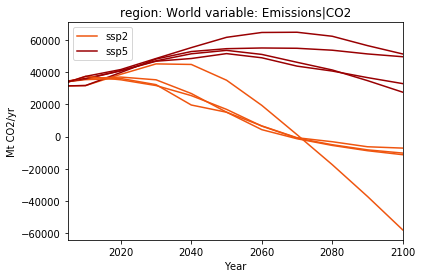

In [6]:
df.line_plot(color='ar6-type')